In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('dataset_part_2.csv')

In [4]:
df.head()



,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,False
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,False
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,False
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,False
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,False


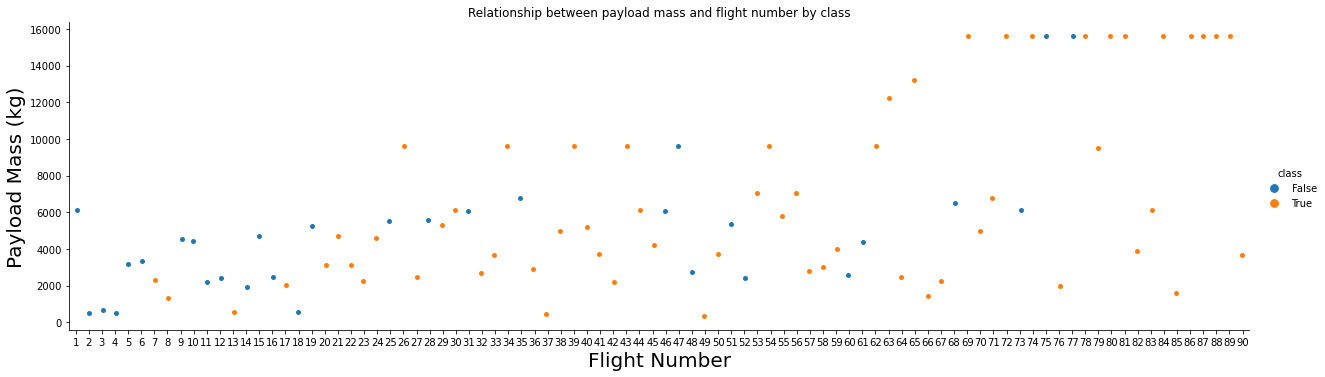

In [27]:
# Relationship between flight number and payload mass by outcome of launch (class)
sns.catplot(data=df, y='PayloadMass', x='FlightNumber', hue='class', aspect=3.5)
plt.title('Relationship between payload mass and flight number by launch outcome')
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Payload Mass (kg)', fontsize=20)
plt.show()

Text(-46.7, 0.5, 'Launch Site')

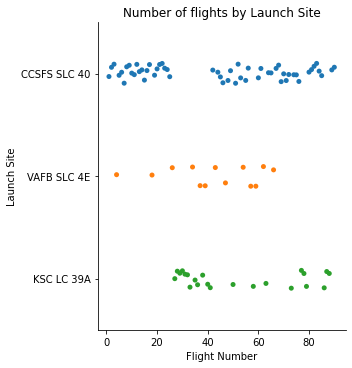

In [29]:
# Relationship between flight number and Launch site
sns.catplot(data=df, y='LaunchSite', x='FlightNumber')
plt.title("Number of flights by Launch Site")
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')

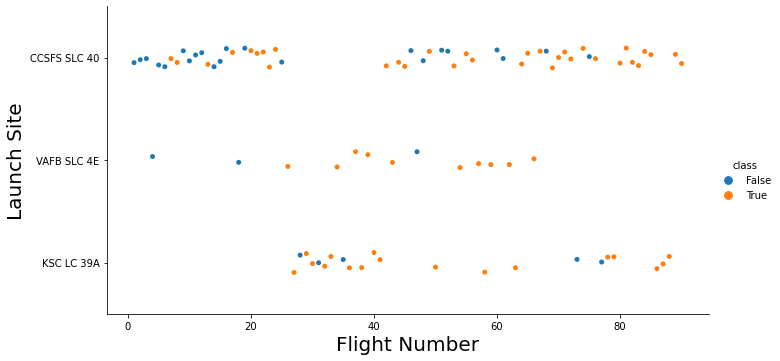

In [7]:
# Relationship between flight number and Launch Site by outcome of launch (class)
sns.catplot(data=df, y='LaunchSite', x='FlightNumber', hue='class', aspect=2)
plt.title("Number of flights by Launch Site by Launch Outcome")
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

Text(-46.7, 0.5, 'Launch Site')

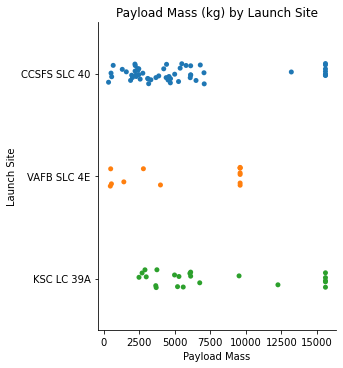

In [30]:
# Relationship between Launch Site and payload mass
sns.catplot(data=df, y='LaunchSite', x='PayloadMass')
plt.title('Payload Mass by Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')


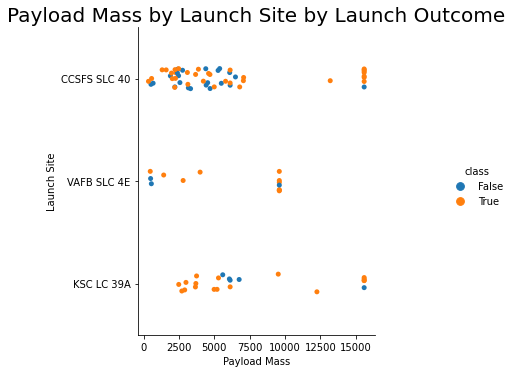

In [32]:
# Relationship between Launch Site and payload mass by success rate
sns.catplot(data=df, y='LaunchSite', x='PayloadMass', hue='class')
plt.title('Payload Mass by Launch Site by Launch Outcome', fontsize=20)
plt.xlabel('Payload Mass', fontsize=10)
plt.ylabel('Launch Site', fontsize=10)
plt.show()

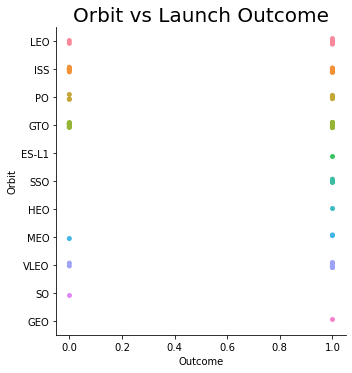

In [33]:
# Relationship between orbit and outcome success
sns.catplot(data=df, y='Orbit', x='class')
plt.title('Orbit vs Launch Outcome', fontsize=20)
plt.xlabel('Outcome', fontsize=10)
plt.ylabel('Orbit', fontsize=10)
plt.show()

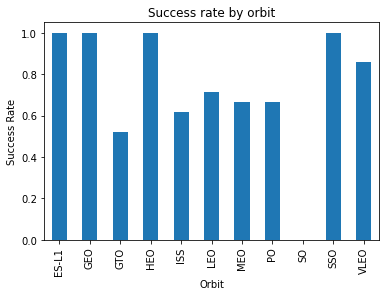

In [26]:
df_orbit = df.groupby('Orbit')['class'].mean()
df_orbit.plot(kind='bar', title='Success rate by orbit')
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.show()

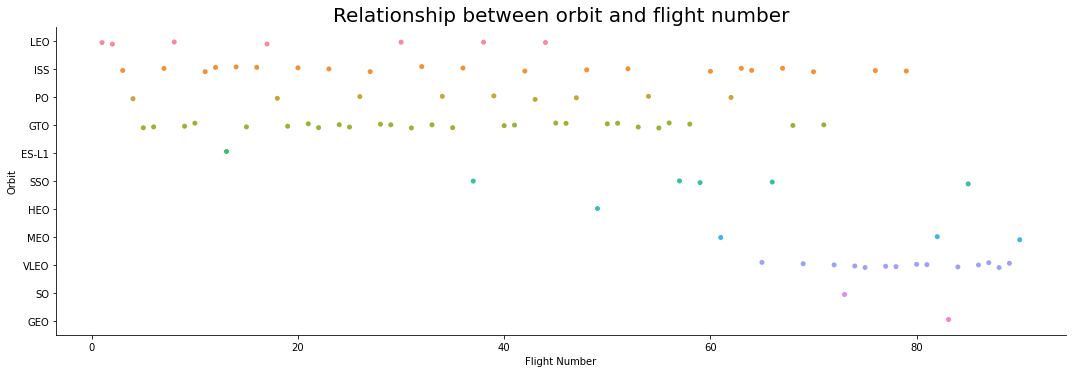

In [34]:
sns.catplot(data=df, y='Orbit', x='FlightNumber', aspect=3)
plt.title('Relationship between orbit and flight number', fontsize=20)
plt.xlabel('Flight Number', fontsize=10)
plt.ylabel('Orbit', fontsize=10)
plt.show()

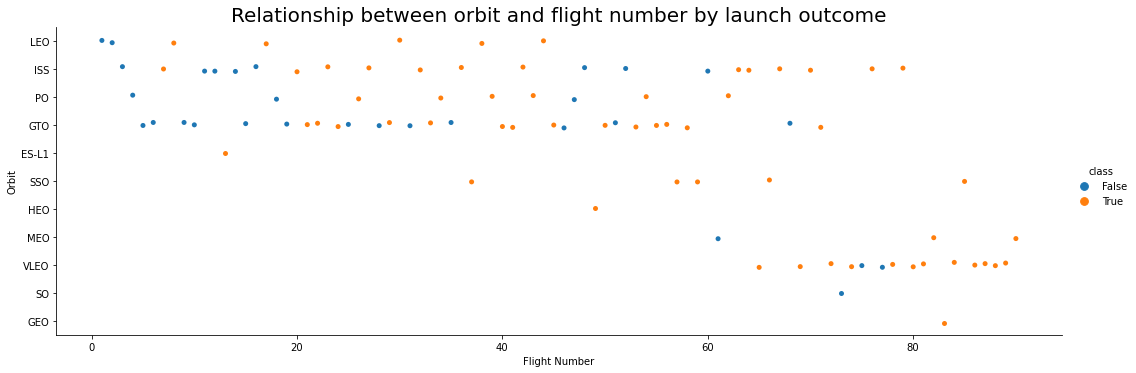

In [35]:
sns.catplot(data=df, y='Orbit', x='FlightNumber', hue='class', aspect=3)
plt.title('Relationship between orbit and flight number by launch outcome', fontsize=20)
plt.xlabel('Flight Number', fontsize=10)
plt.ylabel('Orbit', fontsize=10)
plt.show()

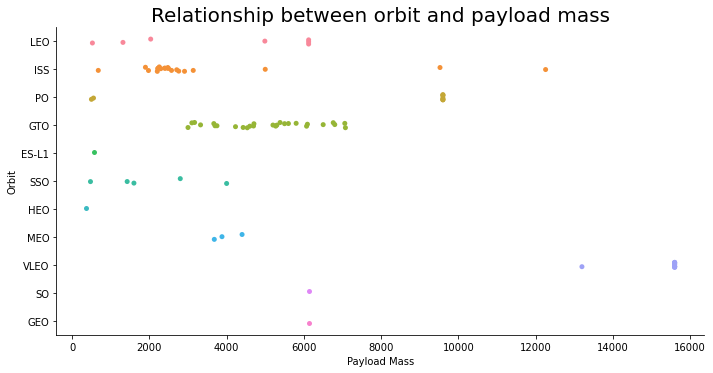

In [36]:
sns.catplot(data=df, y='Orbit', x='PayloadMass', aspect=2)
plt.title('Relationship between orbit and payload mass', fontsize=20)
plt.xlabel('Payload Mass (kg)', fontsize=10)
plt.ylabel('Orbit', fontsize=10)
plt.show()

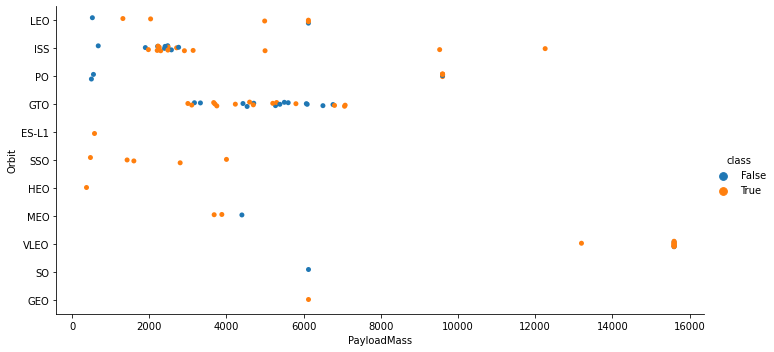

In [15]:
sns.catplot(data=df, y='Orbit', x='PayloadMass', hue='class', aspect=2)
plt.title('Relationship between orbit and payload mass by launch outcome', fontsize=20)
plt.xlabel('Payload Mass (kg)', fontsize=10)
plt.ylabel('Orbit', fontsize=10)
plt.show()

In [16]:

df['year'] = df['Date'].apply(lambda x: x.split('-')[0])
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,class,year
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,False,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,False,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,False,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,False,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,False,2013


In [17]:
df_success = df.groupby('year')[['class']].mean()
df_success.reset_index(inplace=True)
df_success.head()

,year,class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333


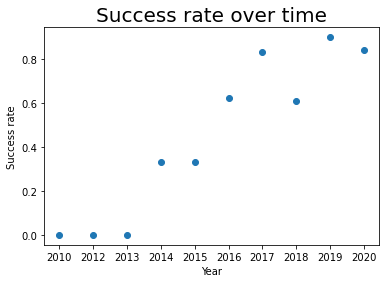

In [37]:
plt.scatter(x= 'year', y='class', data=df_success)
plt.title('Success rate over time', fontsize=20)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Success rate', fontsize=10)
plt.show()

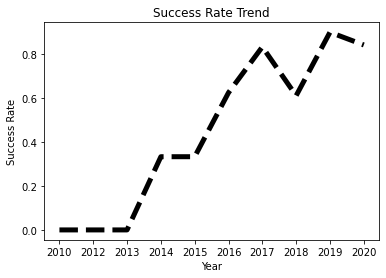

In [19]:
x=df_success['year']
y=df_success['class']
plt.plot(x,y,c='black',linestyle='dashed', linewidth=5)
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Success Rate Trend')
plt.show()


In [20]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.tail()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
85,86,15600.0,VLEO,KSC LC 39A,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060
86,87,15600.0,VLEO,KSC LC 39A,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058
87,88,15600.0,VLEO,KSC LC 39A,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051
88,89,15600.0,VLEO,CCSFS SLC 40,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060
89,90,3681.0,MEO,CCSFS SLC 40,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,8,B1062


In [21]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Orbit         90 non-null     object 
 3   LaunchSite    90 non-null     object 
 4   Flights       90 non-null     int64  
 5   GridFins      90 non-null     bool   
 6   Reused        90 non-null     bool   
 7   Legs          90 non-null     bool   
 8   LandingPad    64 non-null     object 
 9   Block         90 non-null     float64
 10  ReusedCount   90 non-null     int64  
 11  Serial        90 non-null     object 
dtypes: bool(3), float64(2), int64(3), object(4)
memory usage: 6.7+ KB


In [22]:
# generate binary values using get_dummies
features_one_hot = pd.get_dummies(features, columns=['Orbit','LaunchSite','LandingPad','Serial'])
# merge with main df
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     bool   
 4   Reused                               90 non-null     bool   
 5   Legs                                 90 non-null     bool   
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Orbit_ES-L1                          90 non-null     uint8  
 9   Orbit_GEO                            90 non-null     uint8  
 10  Orbit_GTO                            90 non-null     uint8  
 11  Orbit_HEO                         

In [24]:
features_one_hot.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
features_one_hot.to_csv('dataset_part_3.csv',index=False)